In [12]:
#Declaring imports

import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
import numpy as np
import random
import datetime as dt

In [69]:
#Create the Account class 

class Account:  

    __coins = {}

    def __init__(self, filename):
        self.__df = pd.read_csv(filename)
        self.__clean_data()
        self.__find_coins()

    def __clean_data(self): 
        self.__df = self.__df[self.__df['Status'] != 'CANCELED']
        self.__df['Date(UTC)'] = pd.to_datetime(self.__df['Date(UTC)'])
        self.__df['Order Amount'] = self.__df["Order Amount"].apply(lambda x: x[:-4])
        self.__df['Executed'] = self.__df["Executed"].apply(lambda x: x[:-4])
        self.__df['Trading total'] = self.__df["Trading total"].apply(lambda x: x[:-4])
        self.__df['Order Amount'] = self.__df['Order Amount'].astype('float32')
        self.__df['Executed'] = self.__df['Executed'].astype('float32')
        self.__df['Trading total'] = self.__df['Trading total'].astype('float32')
        self.__df.drop(columns=['Status', 'Type', 'Side', 'Order Price', 'Time'], inplace=True)
        self.__df = self.__df.sort_values(by='Date(UTC)')
    
    def __find_coins(self): 
        coins = set(self.__df['Pair'])
        self.__create_coins(coins)
    
    def __create_coins(self, coin_list): 
        for coin in coin_list: 
            coin = coin.replace('USDT', '')
            self.__coins.update({coin.replace('USDT', ''): Coin(coin,self.get_coin_subset(coin))}) 

    def get_coin_subset(self, name):
        name += 'USDT'
        return self.__df[self.__df['Pair'] == name]
    
    def plot_no_of_coins(self): 
        plt.clf() 
        
        names = list(self.__coins.keys())
        total_number_of_coins = []
        avg_price = []
        
        for coin in self.__coins.values(): 
            total_number_of_coins.append(coin.get_sum_coin()) 
            avg_price.append(coin.calculate_dollar_cost_average())
            
        df = pd.DataFrame(list(zip(names,total_number_of_coins,avg_price)), columns = ['Cryptocurrency', 'Total Number of Coins', 'Average Price (USDT)'])
        
        fig_dims = (10,10)
        fig, ax = plt.subplots(figsize=fig_dims)
        g = sns.barplot(x='Cryptocurrency', y='Total Number of Coins', data=df, ax=ax)
        g.set(title='Total Number of Coins vs Cryptocurrency')
        
        for x_pos, y_pos in enumerate(total_number_of_coins): 
            string1 = "Total no. of coins" + str(y_pos)
            string2 = "Avg Price (USDT): " + str(avg_price[x_pos])
            ax.text(x = x_pos-0.4, y = y_pos+10, s = string1)
            ax.text(x = x_pos-0.4, y = y_pos+50, s = string2 )
            
        plt.tight_layout()
        plt.show()
             
                         
    def plot_amount_bought_date(self):
        self.__df['Date(UTC)'] = self.__df['Date(UTC)'].astype('str')       
        fig_dims = (10,10)
        fig, ax = plt.subplots(figsize=fig_dims)
        g = sns.barplot(x='Date(UTC)', y='Trading total', hue = 'Pair', data = self.__df, ax = ax)
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        plt.tight_layout()
        plt.show()
    
    def plot_sum_each_coin(self): 
        plt.clf()
        fig_dims = (10,10)
        fig, ax = plt.subplots(figsize=fig_dims)
        names = []
        sums = []
        
        for name, coin in self.__coins.items(): 
            names.append(name)
            sums.append(coin.get_sum_usdt()) 
        
        g = sns.barplot(x=names, y=sums, ax=ax)
        g.set(xlabel='Cryptocurrency', ylabel='Total Amount Bought(USDT)', title='Total Amount bought vs Cryptocurrency')
        plt.tight_layout()
        plt.show()
        
    def plot_amount_bought_price(self): 
        plt.clf()
        fig_dims =(10,10)
        fig, ax = plt.subplots(figsize=fig_dims)
        g = sns.barplot(x='Average Price', y='Trading total', hue = 'Pair', data = self.__df, ax = ax)
        g.set(xlabel='Price at time of purchase', ylabel='Amount Bought (USDT)', title='Amount bought vs Price')
        g.set_xticklabels(g.get_xticklabels(), rotation = 30)
        plt.tight_layout()
        
        plt.show()
        
    def plot_coin_price_amount_bought_price(self, string): 
        if string not in self.__coins.keys(): 
            raise KeyError 
        else: 
            coin = self.__coins[string]
            coin.plot_amount_bought_price()
        
        
    def get_dataframe(self): 
        return self.__df
    
    def print(self): 
        print(self.__df)

In [70]:
class Coin: 
    
    def __init__(self, name, DataFrame): 
        self.name = name
        self.df = DataFrame
        
    def plot_amount_bought_price(self):
        plt.clf()
        avg_cost = self.calculate_dollar_cost_average()
        g = sns.barplot(x='Average Price', y='Trading total', data = self.df)
        g.axhline(avg_cost)
        plt.tight_layout()
        plt.show()
        
    def calculate_dollar_cost_average(self): 
        avg_cost = (self.df['Trading total'].sum())/(self.df['Order Amount'].sum())
        y = round(avg_cost,2)
        return y
    
    def get_sum_usdt(self): 
        return self.df['Trading total'].sum()
    
    def get_sum_coin(self): 
        return self.df['Executed'].sum()
    

<Figure size 432x288 with 0 Axes>

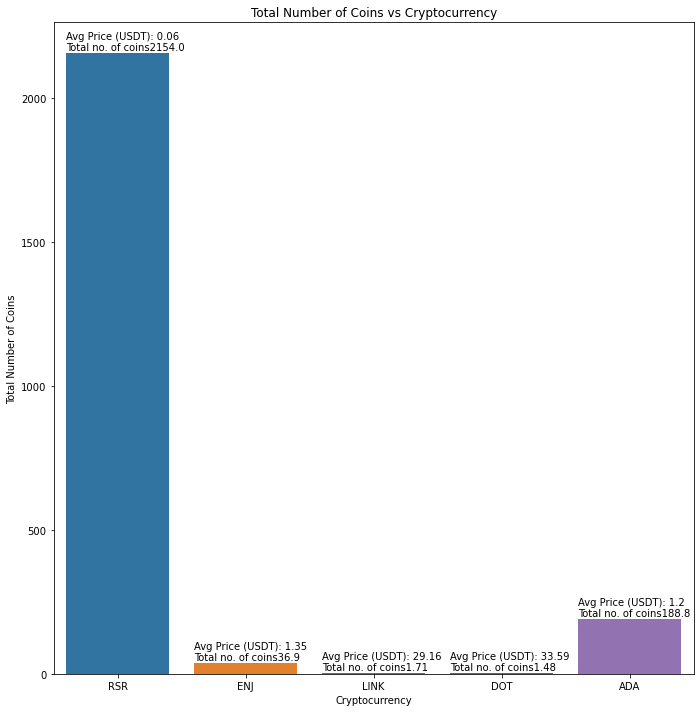

In [71]:
acct = Account('file.csv')
df = acct.get_dataframe()
acct.plot_no_of_coins()

<Figure size 432x288 with 0 Axes>

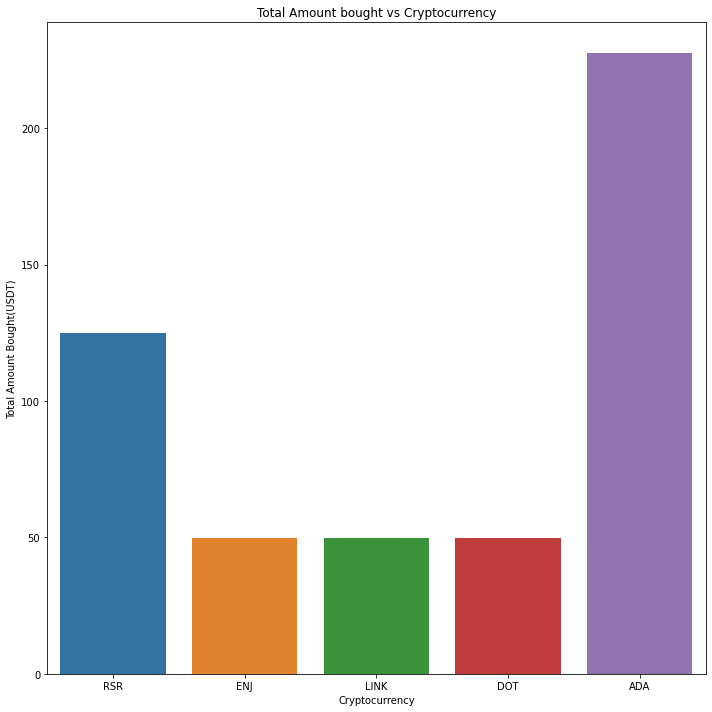

In [72]:
acct.plot_sum_each_coin()

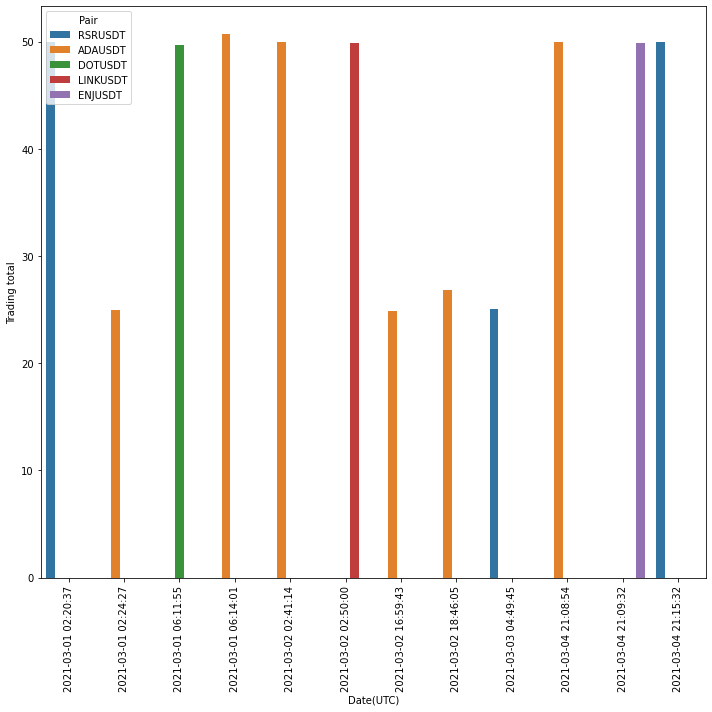

In [43]:
acct.plot_amount_bought_date()

<Figure size 432x288 with 0 Axes>

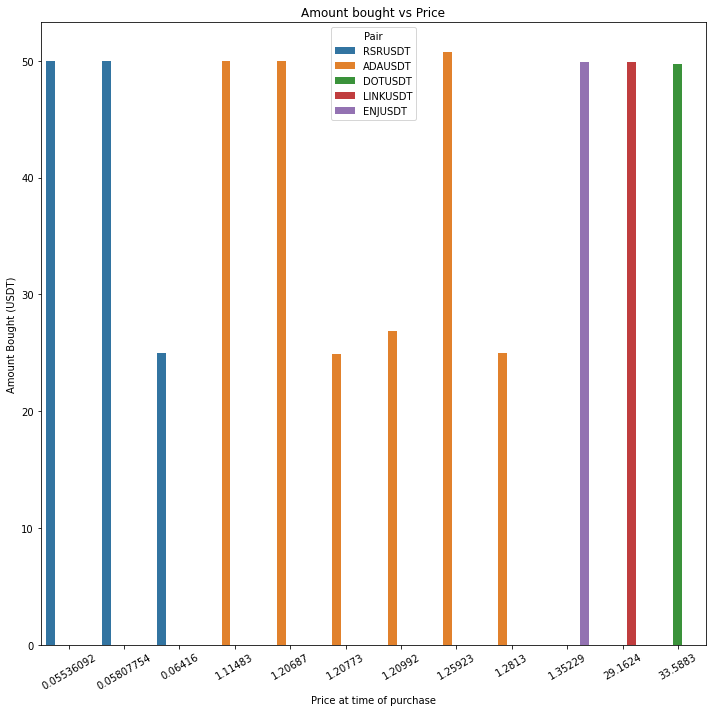

In [44]:
acct.plot_amount_bought_price()

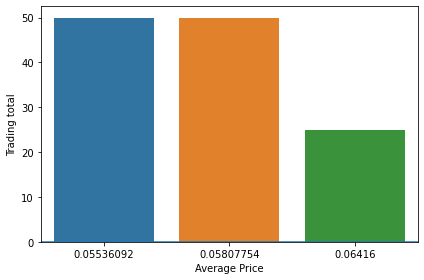

In [45]:
acct.plot_coin_price_amount_bought_price('RSR')